# D2D Classification for resource allocation

In [18]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Activation,Dropout,Concatenate,TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.constraints import unit_norm
from tensorflow.keras import regularizers
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
%matplotlib inline

## Importing The Dataset

In [2]:
df = pd.read_csv('vr_data.csv')

In [3]:
df

,2.2096,2.1123,1.1908,1.3525,6.5403,1.9183,3.3168,6.1588,1.9111,2.4607,...,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29
0,0.43350,2.749000,1.5975,1.130700,4.22360,0.848570,2.03450,4.22170,0.38870,2.28450,...,0,0,1,1,0,1,0,0,1,0
1,0.87538,0.057564,1.2895,0.712780,4.45960,1.605000,0.90355,3.30540,1.14530,3.13750,...,0,0,0,1,0,0,0,1,0,1
2,0.37437,3.169600,2.0344,0.009997,4.33000,0.761020,1.73800,4.22150,4.01470,5.25390,...,0,0,0,1,0,0,0,1,0,1
3,2.73000,3.723000,1.6497,1.658100,3.76020,0.003798,1.67810,3.95040,3.71860,4.58320,...,0,0,1,1,0,1,0,0,0,0
4,4.27220,1.577000,2.1364,1.523200,0.77398,2.664400,3.18910,1.88560,0.35863,3.76520,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,3.29060,2.420100,3.9382,4.754600,1.54960,3.520700,3.05820,3.42760,6.43440,0.35002,...,1,1,1,0,1,0,0,1,0,1
9995,1.63530,1.508400,1.9670,3.687000,3.33530,3.473700,2.62070,3.38430,3.97250,2.67600,...,1,1,1,1,0,0,0,0,0,0
9996,4.52580,5.304400,2.5100,2.788200,1.90430,3.707100,2.14370,3.02780,5.68680,3.10090,...,0,0,0,0,0,0,0,0,0,0
9997,2.54550,6.429000,2.9283,2.807300,2.93440,3.136000,3.28450,1.98580,5.82410,1.49250,...,0,0,1,0,1,0,0,0,0,1


In [4]:
# Dropping the rows where C = 0
#df.drop(df.loc[df['-0']==0].index, inplace=True)
#df.iloc[:, 30:61] = df.iloc[:, 30:61] * 10000000000

In [5]:
Output = df.iloc[:,-30:].values

In [5]:
no_zeros = 0
no_ones = 0
for i in Output:
    for j in i:
        if j == 1:
            no_ones = no_ones +1
        else:
            no_zeros = no_zeros +1

<BarContainer object of 2 artists>

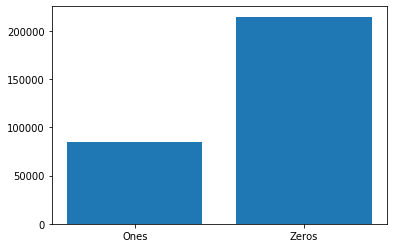

In [6]:
value_count = {'Ones': no_ones, 'Zeros': no_zeros}
counts = list(value_count.keys())
values = list(value_count.values())
plt.bar(counts,values)

In [6]:
X = df.iloc[:,:-30].values
#y = df['0.24'].values
y = df.iloc[:,-30:].values
#from sklearn.preprocessing import MinMaxScaler
#minmaxscaler = MinMaxScaler(feature_range=(-1, 1))
#X = minmaxscaler.fit_transform(X)

#from sklearn.preprocessing import StandardScaler
# define standard scaler
#scaler = StandardScaler()
# transform data
#X = scaler.fit_transform(X)

#from sklearn.preprocessing import Normalizer
#scaler = Normalizer().fit(X)
#X = scaler.transform(X)

## Trying SMOTE
#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)

In [7]:
print(X)
print(y)

[[ 4.3350e-01  2.7490e+00  1.5975e+00 ...  3.5927e-16  2.2079e-14
   7.8843e-14]
 [ 8.7538e-01  5.7564e-02  1.2895e+00 ...  2.3658e-16  1.3259e-15
   7.6254e-14]
 [ 3.7437e-01  3.1696e+00  2.0344e+00 ...  1.2306e-15  1.1575e-14
   2.2803e-13]
 ...
 [ 4.5258e+00  5.3044e+00  2.5100e+00 ...  2.5220e-15  6.4782e-16
  -0.0000e+00]
 [ 2.5455e+00  6.4290e+00  2.9283e+00 ...  3.6522e-15  6.4878e-17
   1.4136e-14]
 [ 3.4728e+00  4.8989e+00  4.5910e+00 ...  1.5324e-15  5.1391e-16
   1.3839e-13]]
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 1]
 [0 1 0 ... 1 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 1]
 [1 1 0 ... 0 0 0]]


In [6]:
X.shape

(9999, 61)

In [7]:
X

array([[ 4.3350e-01,  2.7490e+00,  1.5975e+00, ...,  3.5927e-16,
         2.2079e-14,  7.8843e-14],
       [ 8.7538e-01,  5.7564e-02,  1.2895e+00, ...,  2.3658e-16,
         1.3259e-15,  7.6254e-14],
       [ 3.7437e-01,  3.1696e+00,  2.0344e+00, ...,  1.2306e-15,
         1.1575e-14,  2.2803e-13],
       ...,
       [ 4.5258e+00,  5.3044e+00,  2.5100e+00, ...,  2.5220e-15,
         6.4782e-16, -0.0000e+00],
       [ 2.5455e+00,  6.4290e+00,  2.9283e+00, ...,  3.6522e-15,
         6.4878e-17,  1.4136e-14],
       [ 3.4728e+00,  4.8989e+00,  4.5910e+00, ...,  1.5324e-15,
         5.1391e-16,  1.3839e-13]])

In [8]:
y

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
y.shape

(9999, 30)

In [10]:
np.count_nonzero(y)

85253

In [11]:
14222 - 7111

7111

## Splitting the data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train = np.asarray(X_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')

In [9]:
X_train.shape

(7999, 61)

In [10]:
y_train.shape

(7999, 30)

## Building a baseline model

In [37]:
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(512, activation='relu')(input_layer)
dense_layer_2 = Dense(64, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(32, activation='relu')(dense_layer_2)
dense_layer_4 = Dense(16, activation='relu')(dense_layer_3)
output = (Dense(30, activation='sigmoid'))(dense_layer_4)

In [38]:
#inp = model_basic.input
model_basic = Model(inputs=input_layer, outputs=output)

In [39]:
outputs = [layer.output for layer in model_basic.layers] 

In [40]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.0001)
# Optional use of RMSProp and Adam optimizers as well
model_basic.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse'])
#model_basic.compile(loss='mean_squared_error',optimizer=opt,metrics=['mse'])

In [41]:
print(model_basic.summary())

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 61)]              0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               31744     
_________________________________________________________________
dense_28 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_29 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_30 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_31 (Dense)             (None, 30)                510       
Total params: 67,694
Trainable params: 67,694
Non-trainable params: 0
__________________________________________________

## Training the model

In [42]:
history = model_basic.fit(X_train, y_train, batch_size=128, epochs=1000, verbose=1, validation_split=0.2)

Epoch 1/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.2558 - mse: 0.2558 - val_loss: 0.2564 - val_mse: 0.2564
Epoch 2/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2556 - mse: 0.2556 - val_loss: 0.2562 - val_mse: 0.2562
Epoch 3/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2554 - mse: 0.2554 - val_loss: 0.2561 - val_mse: 0.2561
Epoch 4/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2553 - mse: 0.2553 - val_loss: 0.2559 - val_mse: 0.2559
Epoch 5/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2551 - mse: 0.2551 - val_loss: 0.2557 - val_mse: 0.2557
Epoch 6/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2549 - mse: 0.2549 - val_loss: 0.2556 - val_mse: 0.2556
Epoch 7/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2547 - mse: 0.2547 - val_loss: 0.2554 - val_mse: 0.2554
Epoch 8/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.

50/50 [==============================] - 0s 4ms/step - loss: 0.2474 - mse: 0.2474 - val_loss: 0.2482 - val_mse: 0.2482
Epoch 63/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2473 - mse: 0.2473 - val_loss: 0.2481 - val_mse: 0.2481
Epoch 64/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2472 - mse: 0.2472 - val_loss: 0.2481 - val_mse: 0.2481
Epoch 65/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2472 - mse: 0.2472 - val_loss: 0.2480 - val_mse: 0.2480
Epoch 66/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2471 - mse: 0.2471 - val_loss: 0.2480 - val_mse: 0.2480
Epoch 67/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2470 - mse: 0.2470 - val_loss: 0.2479 - val_mse: 0.2479
Epoch 68/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2470 - mse: 0.2470 - val_loss: 0.2478 - val_mse: 0.2478
Epoch 69/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2469 -

50/50 [==============================] - 0s 4ms/step - loss: 0.2447 - mse: 0.2447 - val_loss: 0.2457 - val_mse: 0.2457
Epoch 124/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2447 - mse: 0.2447 - val_loss: 0.2457 - val_mse: 0.2457
Epoch 125/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2447 - mse: 0.2447 - val_loss: 0.2456 - val_mse: 0.2456
Epoch 126/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2446 - mse: 0.2446 - val_loss: 0.2456 - val_mse: 0.2456
Epoch 127/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2446 - mse: 0.2446 - val_loss: 0.2456 - val_mse: 0.2456
Epoch 128/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2446 - mse: 0.2446 - val_loss: 0.2456 - val_mse: 0.2456
Epoch 129/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2446 - mse: 0.2446 - val_loss: 0.2455 - val_mse: 0.2455
Epoch 130/1000
50/50 [==============================] - 0s 3ms/step - loss: 0

Epoch 184/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2431 - mse: 0.2431 - val_loss: 0.2441 - val_mse: 0.2441
Epoch 185/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2431 - mse: 0.2431 - val_loss: 0.2441 - val_mse: 0.2441
Epoch 186/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2430 - mse: 0.2430 - val_loss: 0.2441 - val_mse: 0.2441
Epoch 187/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2430 - mse: 0.2430 - val_loss: 0.2440 - val_mse: 0.2440
Epoch 188/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2430 - mse: 0.2430 - val_loss: 0.2440 - val_mse: 0.2440
Epoch 189/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2430 - mse: 0.2430 - val_loss: 0.2440 - val_mse: 0.2440
Epoch 190/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2429 - mse: 0.2429 - val_loss: 0.2440 - val_mse: 0.2440
Epoch 191/1000
50/50 [==============================] - 0s 3ms

50/50 [==============================] - 0s 3ms/step - loss: 0.2417 - mse: 0.2417 - val_loss: 0.2427 - val_mse: 0.2427
Epoch 246/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2416 - mse: 0.2416 - val_loss: 0.2427 - val_mse: 0.2427
Epoch 247/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2416 - mse: 0.2416 - val_loss: 0.2427 - val_mse: 0.2427
Epoch 248/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2416 - mse: 0.2416 - val_loss: 0.2427 - val_mse: 0.2427
Epoch 249/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2416 - mse: 0.2416 - val_loss: 0.2426 - val_mse: 0.2426
Epoch 250/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.2415 - mse: 0.2415 - val_loss: 0.2426 - val_mse: 0.2426
Epoch 251/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.2415 - mse: 0.2415 - val_loss: 0.2426 - val_mse: 0.2426
Epoch 252/1000
50/50 [==============================] - 0s 4ms/step - loss: 0

Epoch 306/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2404 - mse: 0.2404 - val_loss: 0.2415 - val_mse: 0.2415
Epoch 307/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2403 - mse: 0.2403 - val_loss: 0.2414 - val_mse: 0.2414
Epoch 308/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2403 - mse: 0.2403 - val_loss: 0.2414 - val_mse: 0.2414
Epoch 309/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2403 - mse: 0.2403 - val_loss: 0.2414 - val_mse: 0.2414
Epoch 310/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2403 - mse: 0.2403 - val_loss: 0.2414 - val_mse: 0.2414
Epoch 311/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2403 - mse: 0.2403 - val_loss: 0.2414 - val_mse: 0.2414
Epoch 312/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2402 - mse: 0.2402 - val_loss: 0.2413 - val_mse: 0.2413
Epoch 313/1000
50/50 [==============================] - 0s 3ms

50/50 [==============================] - 0s 3ms/step - loss: 0.2391 - mse: 0.2391 - val_loss: 0.2402 - val_mse: 0.2402
Epoch 368/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2391 - mse: 0.2391 - val_loss: 0.2402 - val_mse: 0.2402
Epoch 369/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2391 - mse: 0.2391 - val_loss: 0.2402 - val_mse: 0.2402
Epoch 370/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2390 - mse: 0.2390 - val_loss: 0.2402 - val_mse: 0.2402
Epoch 371/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2390 - mse: 0.2390 - val_loss: 0.2401 - val_mse: 0.2401
Epoch 372/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2390 - mse: 0.2390 - val_loss: 0.2401 - val_mse: 0.2401
Epoch 373/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2390 - mse: 0.2390 - val_loss: 0.2401 - val_mse: 0.2401
Epoch 374/1000
50/50 [==============================] - 0s 3ms/step - loss: 0

50/50 [==============================] - 0s 3ms/step - loss: 0.2378 - mse: 0.2378 - val_loss: 0.2390 - val_mse: 0.2390
Epoch 429/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2378 - mse: 0.2378 - val_loss: 0.2390 - val_mse: 0.2390
Epoch 430/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2378 - mse: 0.2378 - val_loss: 0.2390 - val_mse: 0.2390
Epoch 431/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2378 - mse: 0.2378 - val_loss: 0.2389 - val_mse: 0.2389
Epoch 432/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2378 - mse: 0.2378 - val_loss: 0.2389 - val_mse: 0.2389
Epoch 433/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2377 - mse: 0.2377 - val_loss: 0.2389 - val_mse: 0.2389
Epoch 434/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2377 - mse: 0.2377 - val_loss: 0.2389 - val_mse: 0.2389
Epoch 435/1000
50/50 [==============================] - 0s 3ms/step - loss: 0

50/50 [==============================] - 0s 3ms/step - loss: 0.2366 - mse: 0.2366 - val_loss: 0.2378 - val_mse: 0.2378
Epoch 490/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.2366 - mse: 0.2366 - val_loss: 0.2378 - val_mse: 0.2378
Epoch 491/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2365 - mse: 0.2365 - val_loss: 0.2377 - val_mse: 0.2377
Epoch 492/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2365 - mse: 0.2365 - val_loss: 0.2377 - val_mse: 0.2377
Epoch 493/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2365 - mse: 0.2365 - val_loss: 0.2377 - val_mse: 0.2377
Epoch 494/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2365 - mse: 0.2365 - val_loss: 0.2377 - val_mse: 0.2377
Epoch 495/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2365 - mse: 0.2365 - val_loss: 0.2377 - val_mse: 0.2377
Epoch 496/1000
50/50 [==============================] - 0s 3ms/step - loss: 0

Epoch 550/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2354 - mse: 0.2354 - val_loss: 0.2366 - val_mse: 0.2366
Epoch 551/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.2354 - mse: 0.2354 - val_loss: 0.2366 - val_mse: 0.2366
Epoch 552/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2354 - mse: 0.2354 - val_loss: 0.2366 - val_mse: 0.2366
Epoch 553/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2353 - mse: 0.2353 - val_loss: 0.2366 - val_mse: 0.2366
Epoch 554/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2353 - mse: 0.2353 - val_loss: 0.2366 - val_mse: 0.2366
Epoch 555/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2353 - mse: 0.2353 - val_loss: 0.2365 - val_mse: 0.2365
Epoch 556/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2353 - mse: 0.2353 - val_loss: 0.2365 - val_mse: 0.2365
Epoch 557/1000
50/50 [==============================] - 0s 3ms

50/50 [==============================] - 0s 3ms/step - loss: 0.2344 - mse: 0.2344 - val_loss: 0.2356 - val_mse: 0.2356
Epoch 612/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2343 - mse: 0.2343 - val_loss: 0.2356 - val_mse: 0.2356
Epoch 613/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2343 - mse: 0.2343 - val_loss: 0.2356 - val_mse: 0.2356
Epoch 614/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2343 - mse: 0.2343 - val_loss: 0.2356 - val_mse: 0.2356
Epoch 615/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2343 - mse: 0.2343 - val_loss: 0.2356 - val_mse: 0.2356
Epoch 616/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2343 - mse: 0.2343 - val_loss: 0.2356 - val_mse: 0.2356
Epoch 617/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2343 - mse: 0.2343 - val_loss: 0.2356 - val_mse: 0.2356
Epoch 618/1000
50/50 [==============================] - 0s 3ms/step - loss: 0

50/50 [==============================] - 0s 3ms/step - loss: 0.2335 - mse: 0.2335 - val_loss: 0.2348 - val_mse: 0.2348
Epoch 673/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2335 - mse: 0.2335 - val_loss: 0.2348 - val_mse: 0.2348
Epoch 674/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2334 - mse: 0.2334 - val_loss: 0.2348 - val_mse: 0.2348
Epoch 675/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2334 - mse: 0.2334 - val_loss: 0.2348 - val_mse: 0.2348
Epoch 676/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2334 - mse: 0.2334 - val_loss: 0.2347 - val_mse: 0.2347
Epoch 677/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2334 - mse: 0.2334 - val_loss: 0.2347 - val_mse: 0.2347
Epoch 678/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2334 - mse: 0.2334 - val_loss: 0.2347 - val_mse: 0.2347
Epoch 679/1000
50/50 [==============================] - 0s 3ms/step - loss: 0

50/50 [==============================] - 0s 3ms/step - loss: 0.2327 - mse: 0.2327 - val_loss: 0.2341 - val_mse: 0.2341
Epoch 734/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2327 - mse: 0.2327 - val_loss: 0.2341 - val_mse: 0.2341
Epoch 735/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2327 - mse: 0.2327 - val_loss: 0.2341 - val_mse: 0.2341
Epoch 736/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2327 - mse: 0.2327 - val_loss: 0.2341 - val_mse: 0.2341
Epoch 737/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2327 - mse: 0.2327 - val_loss: 0.2340 - val_mse: 0.2340
Epoch 738/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2327 - mse: 0.2327 - val_loss: 0.2340 - val_mse: 0.2340
Epoch 739/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2327 - mse: 0.2327 - val_loss: 0.2340 - val_mse: 0.2340
Epoch 740/1000
50/50 [==============================] - 0s 3ms/step - loss: 0

50/50 [==============================] - 0s 3ms/step - loss: 0.2321 - mse: 0.2321 - val_loss: 0.2335 - val_mse: 0.2335
Epoch 795/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2321 - mse: 0.2321 - val_loss: 0.2335 - val_mse: 0.2335
Epoch 796/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2321 - mse: 0.2321 - val_loss: 0.2335 - val_mse: 0.2335
Epoch 797/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2321 - mse: 0.2321 - val_loss: 0.2335 - val_mse: 0.2335
Epoch 798/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2320 - mse: 0.2320 - val_loss: 0.2334 - val_mse: 0.2334
Epoch 799/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2320 - mse: 0.2320 - val_loss: 0.2334 - val_mse: 0.2334
Epoch 800/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2320 - mse: 0.2320 - val_loss: 0.2334 - val_mse: 0.2334
Epoch 801/1000
50/50 [==============================] - 0s 3ms/step - loss: 0

50/50 [==============================] - 0s 3ms/step - loss: 0.2315 - mse: 0.2315 - val_loss: 0.2330 - val_mse: 0.2330
Epoch 856/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2315 - mse: 0.2315 - val_loss: 0.2330 - val_mse: 0.2330
Epoch 857/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2315 - mse: 0.2315 - val_loss: 0.2330 - val_mse: 0.2330
Epoch 858/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.2315 - mse: 0.2315 - val_loss: 0.2329 - val_mse: 0.2329
Epoch 859/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2315 - mse: 0.2315 - val_loss: 0.2329 - val_mse: 0.2329
Epoch 860/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2315 - mse: 0.2315 - val_loss: 0.2329 - val_mse: 0.2329
Epoch 861/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.2315 - mse: 0.2315 - val_loss: 0.2329 - val_mse: 0.2329
Epoch 862/1000
50/50 [==============================] - 0s 6ms/step - loss: 0

50/50 [==============================] - 0s 3ms/step - loss: 0.2311 - mse: 0.2311 - val_loss: 0.2325 - val_mse: 0.2325
Epoch 917/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2311 - mse: 0.2311 - val_loss: 0.2325 - val_mse: 0.2325
Epoch 918/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2311 - mse: 0.2311 - val_loss: 0.2325 - val_mse: 0.2325
Epoch 919/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2311 - mse: 0.2311 - val_loss: 0.2325 - val_mse: 0.2325
Epoch 920/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2311 - mse: 0.2311 - val_loss: 0.2325 - val_mse: 0.2325
Epoch 921/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2311 - mse: 0.2311 - val_loss: 0.2325 - val_mse: 0.2325
Epoch 922/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2311 - mse: 0.2311 - val_loss: 0.2325 - val_mse: 0.2325
Epoch 923/1000
50/50 [==============================] - 0s 3ms/step - loss: 0

50/50 [==============================] - 0s 3ms/step - loss: 0.2307 - mse: 0.2307 - val_loss: 0.2322 - val_mse: 0.2322
Epoch 978/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2307 - mse: 0.2307 - val_loss: 0.2322 - val_mse: 0.2322
Epoch 979/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2307 - mse: 0.2307 - val_loss: 0.2322 - val_mse: 0.2322
Epoch 980/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2307 - mse: 0.2307 - val_loss: 0.2321 - val_mse: 0.2321
Epoch 981/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2307 - mse: 0.2307 - val_loss: 0.2321 - val_mse: 0.2321
Epoch 982/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.2307 - mse: 0.2307 - val_loss: 0.2321 - val_mse: 0.2321
Epoch 983/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.2307 - mse: 0.2307 - val_loss: 0.2321 - val_mse: 0.2321
Epoch 984/1000
50/50 [==============================] - 0s 3ms/step - loss: 0

## Results

In [29]:
outputs

[<tf.Tensor 'input_6:0' shape=(None, 61) dtype=float32>,
 <tf.Tensor 'dense_22/Relu:0' shape=(None, 512) dtype=float32>,
 <tf.Tensor 'dense_23/Relu:0' shape=(None, 64) dtype=float32>,
 <tf.Tensor 'dense_24/Relu:0' shape=(None, 32) dtype=float32>,
 <tf.Tensor 'dense_25/Relu:0' shape=(None, 16) dtype=float32>,
 <tf.Tensor 'dense_26/Relu:0' shape=(None, 30) dtype=float32>]

In [43]:
score = model_basic.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])


63/63 [==============================] - 0s 2ms/step - loss: 0.2297 - mse: 0.2297
Test Score: 0.22968357801437378
Test Accuracy: 0.22968357801437378


In [31]:
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

KeyError: 'acc'

In [44]:
y_test_pred = model_basic.predict(X_test)
y_train_pred = model_basic.predict(X_train)

In [46]:
y_test_pred = np.round(y_test_pred)

In [47]:
y_test

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [1., 0., 0., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 0.]], dtype=float32)

In [48]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_pred))

0.146


## Value by Value

In [27]:
df.head

<bound method NDFrame.head of        2.2096    2.1123  1.1908    1.3525   6.5403    1.9183   3.3168  \
0     0.43350  2.749000  1.5975  1.130700  4.22360  0.848570  2.03450   
1     0.87538  0.057564  1.2895  0.712780  4.45960  1.605000  0.90355   
2     0.37437  3.169600  2.0344  0.009997  4.33000  0.761020  1.73800   
3     2.73000  3.723000  1.6497  1.658100  3.76020  0.003798  1.67810   
4     4.27220  1.577000  2.1364  1.523200  0.77398  2.664400  3.18910   
...       ...       ...     ...       ...      ...       ...      ...   
9994  3.29060  2.420100  3.9382  4.754600  1.54960  3.520700  3.05820   
9995  1.63530  1.508400  1.9670  3.687000  3.33530  3.473700  2.62070   
9996  4.52580  5.304400  2.5100  2.788200  1.90430  3.707100  2.14370   
9997  2.54550  6.429000  2.9283  2.807300  2.93440  3.136000  3.28450   
9998  3.47280  4.898900  4.5910  2.710800  1.07060  5.428200  2.59170   

       6.1588   1.9111   2.4607  ...  0.20  0.21  0.22  0.23  0.24  0.25  \
0     4.22170  0.

In [28]:
df_val = df.iloc[:,:-61]

In [29]:
df_val

,2.2096,2.1123,1.1908,1.3525,6.5403,1.9183,3.3168,6.1588,1.9111,2.4607,...,3.7625,3.9964,5.5825,3.6917,2.9376,5.6924,0.23376,2.3531,1.2728,1.3592
0,0.43350,2.749000,1.5975,1.130700,4.22360,0.848570,2.03450,4.22170,0.38870,2.28450,...,4.4679,5.15580,3.3439,4.57700,1.88530,1.566200,1.8316,0.61163,4.734300,0.64428
1,0.87538,0.057564,1.2895,0.712780,4.45960,1.605000,0.90355,3.30540,1.14530,3.13750,...,2.3404,2.57360,2.8610,4.99520,0.83764,5.057800,2.2133,3.93410,0.577980,1.65560
2,0.37437,3.169600,2.0344,0.009997,4.33000,0.761020,1.73800,4.22150,4.01470,5.25390,...,3.7868,5.31410,4.8653,3.29890,0.81334,2.681500,2.0676,2.34370,1.166100,2.31340
3,2.73000,3.723000,1.6497,1.658100,3.76020,0.003798,1.67810,3.95040,3.71860,4.58320,...,5.2401,1.08980,4.6604,4.96350,1.32410,2.667700,2.3929,1.51120,1.313300,0.43596
4,4.27220,1.577000,2.1364,1.523200,0.77398,2.664400,3.18910,1.88560,0.35863,3.76520,...,3.8870,3.49220,4.9911,1.97570,0.66438,4.192900,2.8858,2.20000,3.609000,1.65350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,3.29060,2.420100,3.9382,4.754600,1.54960,3.520700,3.05820,3.42760,6.43440,0.35002,...,3.6275,3.24440,3.2887,1.09780,5.43860,0.240640,3.8861,2.92120,3.103400,4.22960
9995,1.63530,1.508400,1.9670,3.687000,3.33530,3.473700,2.62070,3.38430,3.97250,2.67600,...,1.2573,2.71850,5.0240,5.26500,4.28980,0.031734,1.1460,0.15122,5.348700,2.99670
9996,4.52580,5.304400,2.5100,2.788200,1.90430,3.707100,2.14370,3.02780,5.68680,3.10090,...,1.3116,3.32440,2.8225,1.51520,3.12700,0.670030,3.4048,2.42830,2.597900,3.25650
9997,2.54550,6.429000,2.9283,2.807300,2.93440,3.136000,3.28450,1.98580,5.82410,1.49250,...,1.6570,0.52779,4.5040,0.53753,4.19000,0.625550,4.0887,1.53260,0.250450,4.11910


In [34]:
df_weights = df.iloc[:,30:-31]

In [35]:
df_weights

,1.8448e-13,7.6782e-15,5.8468e-13,2.1994e-09,3.1986e-15,1.2168e-16,8.078e-15,1.719e-17,5.5803e-15,1.2438e-16,...,2.1703e-15,1.336e-12,1.1562e-16,1.4545e-14,1.0876e-14,7.8243e-16,2.2805e-13,2.3438e-13,4.8311e-17,1.4615e-14
0,1.614200e-14,7.135000e-15,5.014900e-13,9.363100e-10,1.002200e-15,4.931400e-16,2.014700e-15,7.928500e-17,2.446400e-15,9.475100e-18,...,1.265000e-14,3.342500e-12,1.218100e-15,3.504900e-15,1.789100e-15,3.111600e-16,1.517700e-12,6.209800e-14,3.592700e-16,2.207900e-14
1,4.047300e-13,4.595600e-14,2.928300e-14,1.509900e-10,8.762100e-18,9.456800e-17,1.014000e-15,5.911800e-16,1.526400e-14,3.893700e-17,...,8.351900e-15,2.905600e-13,4.528000e-16,4.433400e-15,5.597800e-15,2.367200e-15,3.305400e-14,6.477700e-14,2.365800e-16,1.325900e-15
2,4.550400e-13,5.325600e-15,1.244000e-13,1.883600e-10,4.256400e-15,2.087100e-16,1.419300e-15,6.331400e-16,5.876500e-15,2.323800e-16,...,9.127000e-16,1.502900e-13,3.341500e-16,6.636700e-15,1.684400e-15,1.292800e-15,7.036000e-13,5.566300e-14,1.230600e-15,1.157500e-14
3,1.109000e-13,3.663600e-15,7.213200e-13,5.806300e-09,2.692500e-15,8.890700e-16,3.692900e-15,1.660900e-16,8.722300e-15,8.662800e-17,...,1.040600e-14,9.554800e-13,5.260000e-16,1.024700e-15,6.279800e-15,2.290200e-15,5.730900e-13,1.154100e-13,2.452800e-16,2.961100e-15
4,1.647500e-13,7.184100e-15,2.119100e-13,3.764400e-10,5.382400e-15,2.053700e-16,2.828600e-17,2.939400e-17,1.373600e-15,9.996700e-17,...,1.978400e-15,7.718400e-14,2.999400e-16,2.030700e-15,2.670500e-15,4.852900e-17,1.057100e-13,3.594200e-14,1.051000e-16,8.197300e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2.276700e-17,1.458300e-16,4.671000e-14,1.863700e-14,1.126100e-14,7.119500e-18,2.461600e-14,2.896000e-14,1.012900e-19,1.675400e-14,...,4.526300e-14,5.080800e-16,7.376600e-15,7.892100e-16,2.677100e-16,8.221500e-16,1.699500e-15,7.662700e-15,2.361700e-15,3.999000e-16
9995,1.092800e-16,6.562700e-17,1.797900e-13,2.459300e-14,7.235500e-15,2.785500e-16,1.660800e-13,5.180100e-15,1.584600e-19,3.538200e-14,...,7.381300e-15,9.857100e-17,4.010500e-15,1.147400e-15,7.110700e-16,5.845600e-17,5.532100e-15,2.338800e-15,2.932200e-15,3.396700e-17
9996,4.933200e-17,7.415100e-16,4.641800e-14,4.984600e-14,3.681500e-14,3.129500e-15,2.372100e-13,1.605800e-14,1.002300e-19,3.103500e-15,...,5.490100e-15,6.035800e-17,1.380500e-14,1.583400e-15,1.037800e-15,1.811600e-16,4.515400e-16,2.725100e-15,2.522000e-15,6.478200e-16
9997,3.851500e-17,1.249500e-15,1.598900e-15,5.087400e-15,1.699100e-14,2.075500e-17,4.913300e-14,5.803900e-15,1.903900e-19,8.630100e-15,...,1.286100e-14,1.860200e-15,6.318300e-15,2.560400e-16,1.777900e-17,2.986500e-16,6.065400e-16,6.435700e-16,3.652200e-15,6.487800e-17


In [36]:
X1 = df_val.values

In [37]:
X2 = df_weights.values

In [38]:
X1

array([[0.4335  , 2.749   , 1.5975  , ..., 0.61163 , 4.7343  , 0.64428 ],
       [0.87538 , 0.057564, 1.2895  , ..., 3.9341  , 0.57798 , 1.6556  ],
       [0.37437 , 3.1696  , 2.0344  , ..., 2.3437  , 1.1661  , 2.3134  ],
       ...,
       [4.5258  , 5.3044  , 2.51    , ..., 2.4283  , 2.5979  , 3.2565  ],
       [2.5455  , 6.429   , 2.9283  , ..., 1.5326  , 0.25045 , 4.1191  ],
       [3.4728  , 4.8989  , 4.591   , ..., 4.6732  , 0.051054, 4.1926  ]])

In [39]:
X2

array([[1.6142e-14, 7.1350e-15, 5.0149e-13, ..., 6.2098e-14, 3.5927e-16,
        2.2079e-14],
       [4.0473e-13, 4.5956e-14, 2.9283e-14, ..., 6.4777e-14, 2.3658e-16,
        1.3259e-15],
       [4.5504e-13, 5.3256e-15, 1.2440e-13, ..., 5.5663e-14, 1.2306e-15,
        1.1575e-14],
       ...,
       [4.9332e-17, 7.4151e-16, 4.6418e-14, ..., 2.7251e-15, 2.5220e-15,
        6.4782e-16],
       [3.8515e-17, 1.2495e-15, 1.5989e-15, ..., 6.4357e-16, 3.6522e-15,
        6.4878e-17],
       [8.3564e-17, 7.6377e-16, 5.5734e-14, ..., 4.9839e-15, 1.5324e-15,
        5.1391e-16]])

In [57]:
y

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [61]:
C = C.to_numpy()

In [62]:
C

array([ 7.8843e-14,  7.6254e-14,  2.2803e-13, ..., -0.0000e+00,
        1.4136e-14,  1.3839e-13])

## Concatenated Model

In [66]:
input_values = Input(shape=(X1.shape[1],))
input_weights = Input(shape=(X2.shape[1],))
input_constraint = Input(shape=(1))
inputs_concat = Concatenate()([input_values,input_weights,input_constraint])
lay = Dense(128,activation='sigmoid')(inputs_concat)
lay = Dense(30,activation='sigmoid')(lay)
model = Model(inputs = [input_values,input_weights,input_constraint],outputs = [lay])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [67]:
model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 61)           0           input_6[0][0]                    
                                                                 input_7[0][0]         

In [68]:
history = model.fit((X1,X2,C), y, batch_size=128, epochs=1000, verbose=1, validation_split=0.2)

Epoch 1/1000
63/63 [==============================] - 0s 4ms/step - loss: 0.6178 - acc: 0.1626 - val_loss: 0.5949 - val_acc: 0.0380
Epoch 2/1000
63/63 [==============================] - 0s 3ms/step - loss: 0.5879 - acc: 0.0724 - val_loss: 0.5845 - val_acc: 0.0480
Epoch 3/1000
63/63 [==============================] - 0s 3ms/step - loss: 0.5781 - acc: 0.0615 - val_loss: 0.5764 - val_acc: 0.0750
Epoch 4/1000
63/63 [==============================] - 0s 3ms/step - loss: 0.5696 - acc: 0.0719 - val_loss: 0.5678 - val_acc: 0.0565
Epoch 5/1000
63/63 [==============================] - 0s 3ms/step - loss: 0.5625 - acc: 0.0653 - val_loss: 0.5626 - val_acc: 0.0835
Epoch 6/1000
63/63 [==============================] - 0s 3ms/step - loss: 0.5568 - acc: 0.0675 - val_loss: 0.5577 - val_acc: 0.0675
Epoch 7/1000
63/63 [==============================] - 0s 3ms/step - loss: 0.5525 - acc: 0.0641 - val_loss: 0.5553 - val_acc: 0.0800
Epoch 8/1000
63/63 [==============================] - 0s 3ms/step - loss: 0.

KeyboardInterrupt: 